In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
################### LOADING DATA####################
# defining column names
column_names = [
    "Subject identifier", "Jitter", "Jitter Absolute", "Jitter RAP", "Jitter PPQ5",
    "Jitter DDP", "Shimmer", "Shimmer dB", "Shimmer APQ3", "Shimmer APQ5",
    "Shimmer APQ11", "Shimmer DDA", "Harmonicity NHR_HNR", "Harmonicity NHR",
    "Harmonicity HNR", "Pitch Median", "Pitch Mean", "Pitch Std", "Pitch Min",
    "Pitch Max", "Pulse Number", "Pulse Number of periods", "Pulse Mean period",
    "Pulse Std of period", "Voice Unvoiced frames", "Voice Number of breaks",
    "Voice Degree of breaks", "UPDRS", "PD indicator"
]

data = pd.read_csv('po1_data.txt', header=None, names=column_names)
data



,Subject identifier,Jitter,Jitter Absolute,Jitter RAP,Jitter PPQ5,Jitter DDP,Shimmer,Shimmer dB,Shimmer APQ3,Shimmer APQ5,...,Pitch Max,Pulse Number,Pulse Number of periods,Pulse Mean period,Pulse Std of period,Voice Unvoiced frames,Voice Number of breaks,Voice Degree of breaks,UPDRS,PD indicator
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1035,40,5.127,0.000398,2.721,2.510,8.162,9.846,0.965,4.593,6.806,...,158.591,63,60,0.007766,0.001066,24.194,2,15.113,1,0
1036,40,1.757,0.000133,0.808,0.690,2.425,7.571,0.740,2.720,3.927,...,143.797,47,44,0.007561,0.000430,46.053,1,25.792,1,0
1037,40,2.912,0.000226,1.141,1.266,3.423,15.489,1.456,6.433,10.138,...,149.641,79,77,0.007767,0.000881,20.000,1,4.574,1,0
1038,40,3.788,0.000275,1.786,1.484,5.359,15.702,1.367,6.374,11.094,...,451.366,75,70,0.007257,0.001714,16.667,3,19.575,1,0


In [37]:
################## Data Preprocessing ###################################
#checking statistics
print(data.describe())

#checking for missing values
print(data.isnull().sum())

       Subject identifier       Jitter  Jitter Absolute   Jitter RAP  \
count          1040.00000  1040.000000      1040.000000  1040.000000   
mean             20.50000     2.679523         0.000170     1.247053   
std              11.54895     1.765053         0.000106     0.979462   
min               1.00000     0.190000         0.000006     0.062000   
25%              10.75000     1.507500         0.000095     0.617000   
50%              20.50000     2.396000         0.000151     1.035500   
75%              30.25000     3.411500         0.000229     1.602500   
max              40.00000    14.376000         0.000777     8.016000   

       Jitter PPQ5   Jitter DDP      Shimmer   Shimmer dB  Shimmer APQ3  \
count  1040.000000  1040.000000  1040.000000  1040.000000   1040.000000   
mean      1.348327     3.741161    12.918391     1.194895      5.699600   
std       1.138742     2.938443     5.452204     0.420071      3.015183   
min       0.081000     0.185000     1.185000     0.

In [39]:
####### splitting into two groups, one with Parkinson disease and another with not
ppd_data = data[data['PD indicator'] == 1]
non_ppd_data = data[data['PD indicator'] == 0]


In [41]:
##### conducting t tests for inferential statistics
significant_features = []

for column in data.columns:
    if column != 'PD indicator':
        t_stat, p_value = ttest_ind(ppd_data[column], non_ppd_data[column])

        # assuming signifcance level of 0.05
        if p_value < 0.05:
            significant_features.append((column, p_value))

# sorting the data by p value so that we can identify the most significant features
sorted_features = sorted(significant_features, key=lambda x: x[1])

for feature, p_value in sorted_features:
    print(f"{feature}: P-value = {p_value}")

Subject identifier: P-value = 3.66025913e-315
UPDRS: P-value = 1.0259139698689208e-192
Jitter Absolute: P-value = 6.055252751057853e-08
Shimmer APQ11: P-value = 2.1507317386375703e-06
Pitch Max: P-value = 6.418899305637324e-06
Voice Degree of breaks: P-value = 4.510173397436688e-05
Voice Unvoiced frames: P-value = 7.95277348097335e-05
Pitch Std: P-value = 9.068988191270615e-05
Jitter RAP: P-value = 0.0003292913407710949
Jitter DDP: P-value = 0.00032952816569233555
Jitter PPQ5: P-value = 0.0003379936090640013
Pitch Mean: P-value = 0.000852121912640331
Jitter: P-value = 0.0016344496445435067
Pitch Median: P-value = 0.006574901469342033
Pulse Mean period: P-value = 0.00833933869357909
Harmonicity NHR_HNR: P-value = 0.008886608396824192
Voice Number of breaks: P-value = 0.010009929669102151
Harmonicity NHR: P-value = 0.014127255939245669


<ipython-input-41-4ed95f7775f6>:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = ttest_ind(ppd_data[column], non_ppd_data[column])


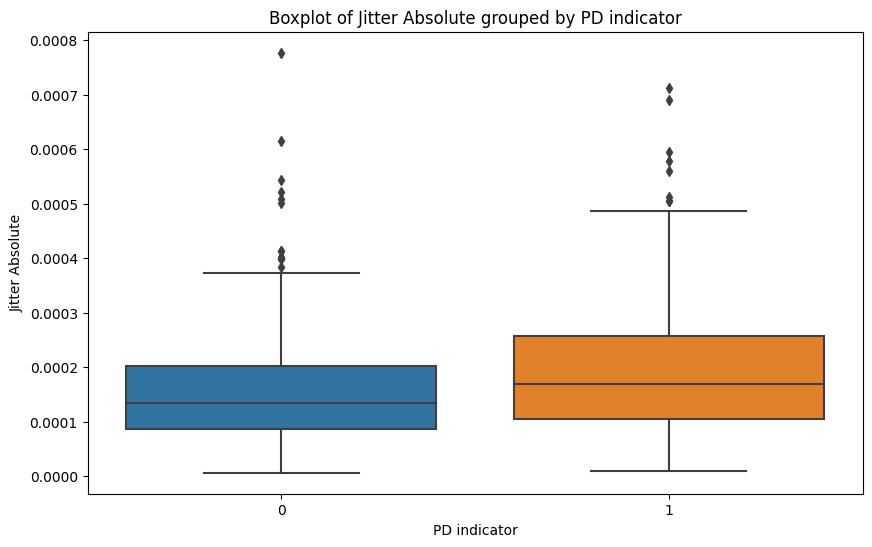

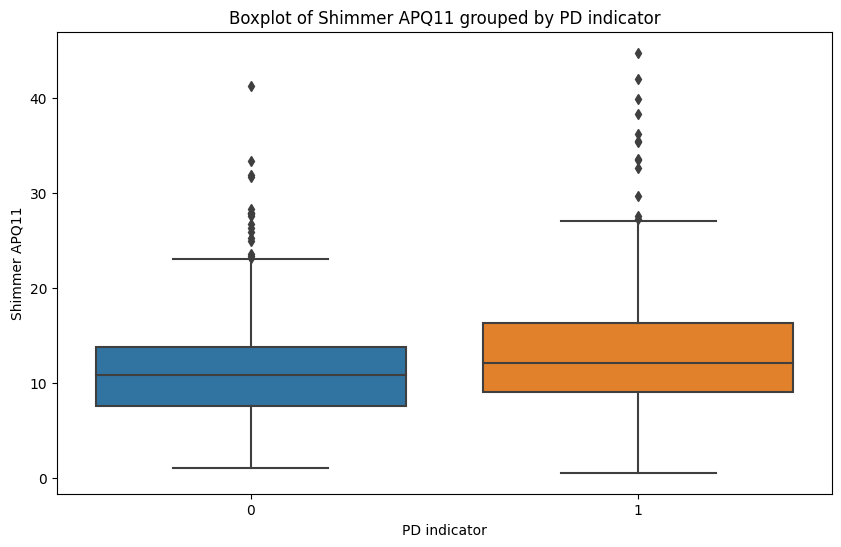

In [52]:
# Features for which we want to create boxplots
selected_features = [
    'Jitter Absolute', 'Shimmer APQ11'
]

# Generate boxplots for each feature
for feature in selected_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='PD indicator', y=feature, data=df)
    plt.title(f'Boxplot of {feature} grouped by PD indicator')
    plt.show()


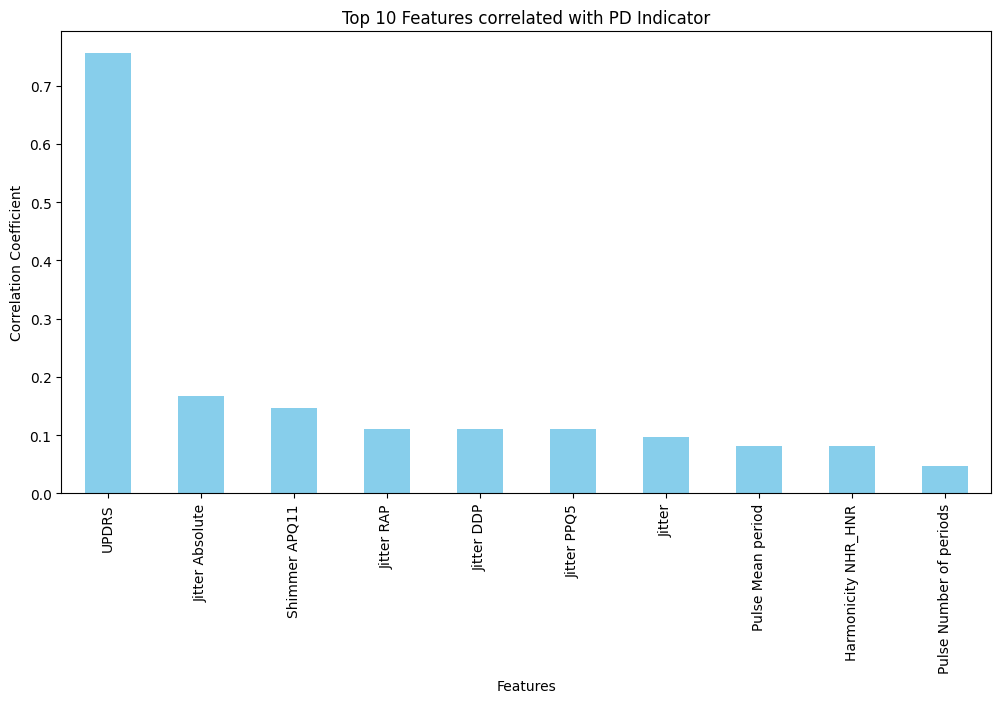

In [54]:
correlation_matrix = df.corr()
correlations_with_target = correlation_matrix["PD indicator"].sort_values(ascending=False)

# Exclude 'PD indicator' itself and take top 10 features
top_features = correlations_with_target[1:11]

plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 10 Features correlated with PD Indicator')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()